In [1]:
import neptune

In [ ]:
NEPTUNE_API_TOKEN = 'eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIxMGM5ZDhiMy1kOTlhLTRlMTAtOGFlYy1hOTQzMDE1YjZlNjcifQ=='


project = neptune.init_project(
    project='revivemed/RCC',
    mode="read-only",
    api_token=NEPTUNE_API_TOKEN
)

runs_table_df = project.fetch_runs_table(query="'pretrain/kwargs/encoder_kind'=='AE'",state='inactive',limit=100).to_pandas()

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from misc import get_color_map, assign_color_map

In [102]:
val_embed_file = '/Users/jonaheaton/Desktop/Z_embed_val.csv'
train_embed_file = '/Users/jonaheaton/Desktop/Z_embed_train.csv'

val_embed = pd.read_csv(val_embed_file, index_col=0)
train_embed = pd.read_csv(train_embed_file, index_col=0)
test_embed = pd.read_csv('/Users/jonaheaton/Desktop/Z_embed_test.csv', index_col=0)

/var/folders/zk/pr84pr3n16z3yzz_rrstxmmc0000gn/T/ipykernel_62467/1472273224.py:5: DtypeWarning: Columns (70,71,72,74,76,77,78,82,83,84,85,89,95,104) have mixed types. Specify dtype option on import or set low_memory=False.
  train_embed = pd.read_csv(train_embed_file, index_col=0)


In [133]:
metadata_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/April_05_Data/metadata.csv'

metadata = pd.read_csv(metadata_file, index_col=0)

In [142]:
finetune_train_embed = pd.read_csv('/Users/jonaheaton/Desktop/Z_embed_finetune_trainval.csv', index_col=0)
finetune_test_embed = pd.read_csv('/Users/jonaheaton/Desktop/Z_embed_finetune_test.csv', index_col=0)
orig_train_embed = pd.read_csv('/Users/jonaheaton/Desktop/Z_embed_orig_trainval.csv', index_col=0)
orig_test_embed = pd.read_csv('/Users/jonaheaton/Desktop/Z_embed_orig_test.csv', index_col=0)

orig_test_embed = orig_test_embed.join(metadata)
orig_train_embed = orig_train_embed.join(metadata)
finetune_train_embed = finetune_train_embed[['UMAP1', 'UMAP2']].copy()
finetune_train_embed = finetune_train_embed.join(metadata)

In [158]:
orig_all_embed_file = "/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/alignment_id_36/grid_search_index_1/umap_df_zscore_subset_robust_Freq, Cohort Log Size Weighted_0.2_rem_['549', '551', '547']_recompute.csv"
orig_all_embed = pd.read_csv(orig_all_embed_file, index_col=0)

In [159]:
orig_all_embed = orig_all_embed.join(metadata, lsuffix='_l')

In [143]:
finetune_train_embed

,UMAP1,UMAP2,cohort_id,Study ID,Cohort Label,Cohort ID,OS,OS_Event,Age,subject ID,...,is Pediatric,Cohort Label ENC,Study ID ENC,file id,Age Range (min),Age Range (max),IMDC,IMDC ORDINAL,IMDC BINARY,is Female
0092_Marios_PD1_Inhib2_HP-L1366505-7.mzML,0.129737,6.306265,541,ST001237,adult_cancer,541,3.614000,1.0,64.0,CA209025-125-525,...,False,0,4,0092_Marios_PD1_Inhib2_HP-L1366505-7.mzML,64.0,64.0,INTERMEDIATE,1.0,NaN,1.0
0432_Marios_PD1_Inhib2_HP-EA185078-17.mzML,-1.515864,3.802024,541,ST001237,adult_cancer,541,3.909700,1.0,65.0,CA209025-108-510,...,False,0,4,0432_Marios_PD1_Inhib2_HP-EA185078-17.mzML,65.0,65.0,POOR,0.0,0.0,0.0
0487_Marios_PD1_Inhib2_HP-L1443422-9.mzML,0.524329,3.507767,541,ST001237,adult_cancer,541,50.759754,0.0,57.0,CA209025-84-1041,...,False,0,4,0487_Marios_PD1_Inhib2_HP-L1443422-9.mzML,57.0,57.0,POOR,0.0,0.0,0.0
0077_Marios_PD1_Inhib2_HP-E9479165-7.mzML,9.788370,9.670778,541,ST001237,adult_cancer,541,31.047228,1.0,69.0,CA209025-75-615,...,False,0,4,0077_Marios_PD1_Inhib2_HP-E9479165-7.mzML,69.0,69.0,FAVORABLE,2.0,1.0,1.0
1090_Marios_PD1_Inhib2_HP-E9123055-7.mzML,7.067282,7.344611,541,ST001237,adult_cancer,541,1.938400,1.0,68.0,CA209025-114-60,...,False,0,4,1090_Marios_PD1_Inhib2_HP-E9123055-7.mzML,68.0,68.0,INTERMEDIATE,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178_Marios_PD1_Inhib2_HP-AD193616-7.mzML,10.581422,7.467281,541,ST001237,adult_cancer,541,56.542094,1.0,62.0,CA209025-49-66,...,False,0,4,1178_Marios_PD1_Inhib2_HP-AD193616-7.mzML,62.0,62.0,INTERMEDIATE,1.0,NaN,0.0
1176_Marios_PD1_Inhib2_HP-AE902414-7.mzML,6.535977,7.227790,541,ST001237,adult_cancer,541,45.963039,1.0,59.0,CA209025-14-1070,...,False,0,4,1176_Marios_PD1_Inhib2_HP-AE902414-7.mzML,59.0,59.0,INTERMEDIATE,1.0,NaN,1.0
0934_Marios_PD1_Inhib2_HP-AF063577-9.mzML,11.641895,8.347924,541,ST001237,adult_cancer,541,34.266940,0.0,69.0,CA209025-21-1027,...,False,0,4,0934_Marios_PD1_Inhib2_HP-AF063577-9.mzML,69.0,69.0,INTERMEDIATE,1.0,NaN,1.0
1025_Marios_PD1_Inhib2_HP-AD452591-7.mzML,9.341312,9.611528,541,ST001237,adult_cancer,541,19.318300,1.0,43.0,CA209025-13-228,...,False,0,4,1025_Marios_PD1_Inhib2_HP-AD452591-7.mzML,43.0,43.0,FAVORABLE,2.0,1.0,0.0


In [176]:


def create_umap(set_name,hue_col):
    if set_name.lower() == 'train':
        Z_embed = train_embed
    elif set_name.lower() == 'val':
        Z_embed = val_embed
    elif set_name.lower() == 'test':
        Z_embed = test_embed
    elif set_name.lower() == 'finetune_train':
        Z_embed = finetune_train_embed
    elif set_name.lower() == 'finetune_test':
        Z_embed = finetune_test_embed
    elif set_name.lower() == 'orig_train':
        Z_embed = orig_train_embed
    elif set_name.lower() == 'orig_test':
        Z_embed = orig_test_embed
    elif set_name.lower() == 'all':
        # Z_embed = pd.concat([train_embed,val_embed,test_embed])
        Z_embed = orig_all_embed



    plot_title = f'UMAP of Latent Space ({set_name})'

    Z_count_sum = (~Z_embed[hue_col].isnull()).sum()
    print(f'Number of samples in {set_name}: {Z_count_sum}')
    if Z_embed[hue_col].nunique() > 30:
        palette = 'flare'
        Z_counts = None
    else:
        # palette = get_color_map(Z_embed[hue_col].nunique())
        palette = assign_color_map(Z_embed[hue_col].unique())
        Z_counts = Z_embed[hue_col].value_counts()

    # marker_sz = 20/np.log10(Z_count_sum)
    marker_sz = 10/np.log(Z_count_sum)
    print(f'Marker size: {marker_sz}')

    plt.figure(figsize=(10,10))
    fig = sns.scatterplot(data=Z_embed, x='UMAP1', y='UMAP2', hue=hue_col, palette=palette,s=marker_sz)
    # place the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # edit the legend to include the number of samples in each cohort
    handles, labels = fig.get_legend_handles_labels()
    if Z_counts is not None:
        # new_labels = [f'{label} ({Z_embed[Z_embed[hue_col]==label].shape[0]})' for label in labels]
        new_labels = []
        for label in labels:
            # new_labels.append(f'{label} ({Z_counts.loc[eval(label)]})')
            try:
                new_labels.append(f'{label} ({Z_counts.loc[label]})')
            except KeyError:
                new_labels.append(f'{label} ({Z_counts.loc[eval(label)]})')
    else:
        new_labels = labels

    # make the size of the markers in the handles larger
    for handle in handles:
        # print(dir(handle))
        handle.set_markersize(10)
        # handle._sizes = [100]

    plt.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=hue_col + f' (N={Z_count_sum})')
    plt.title(plot_title)

    return 


Number of samples in all: 17685
Marker size: 1.0224455318801653


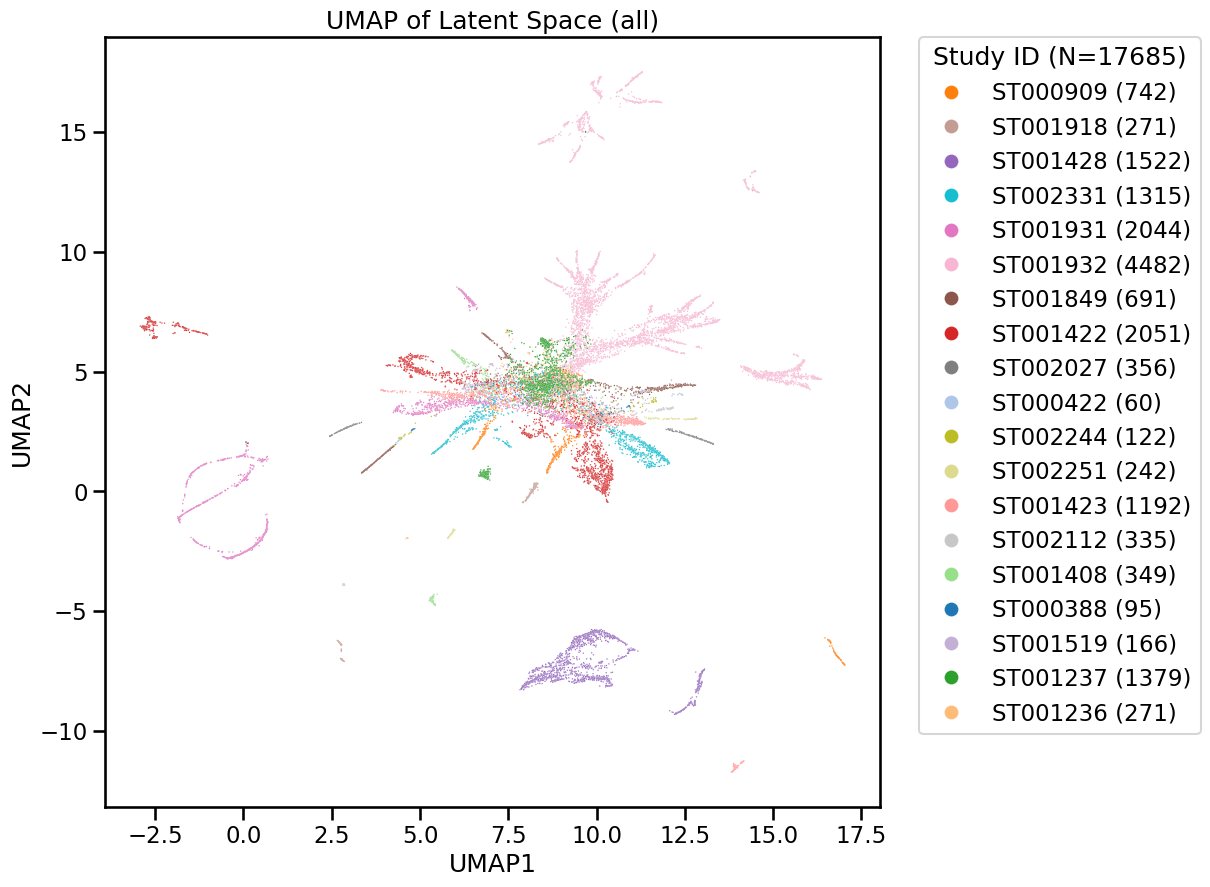

In [178]:
hue_col = 'IMDC'
# hue_col = 'Age'
hue_col = 'Study ID'
# hue_col = 'is Pediatric'
# hue_col = 'Sex'
# hue_col = 'Cohort Label'
# create_umap('finetune_test',hue_col)
create_umap('all',hue_col)

In [ ]:
metadata_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/April_05_Data/metadata.csv'

metadata = pd.read_csv(metadata_file, index_col=0)

In [ ]:
metadata.groupby('Set')['IMDC'].value_counts()

Set         IMDC        
Finetune    INTERMEDIATE    271
            POOR             86
            FAVORABLE        69
            NOT REPORTED     17
Pretrain    INTERMEDIATE    289
            POOR            107
            FAVORABLE        71
            NOT REPORTED     13
Test        INTERMEDIATE     86
            POOR             34
            FAVORABLE        23
            NOT REPORTED      6
Validation  INTERMEDIATE     82
            POOR             39
            FAVORABLE        22
            NOT REPORTED      6
Name: count, dtype: int64

In [ ]:
metadata.groupby('Set')['Sex'].value_counts()

Set         Sex
Finetune    M       331
            F       112
Pretrain    M      3480
            F      2349
Test        M       108
            F        41
Validation  M       111
            F        38
Name: count, dtype: int64

In [ ]:
pretrain_metadata = metadata[metadata['Set'] == 'Pretrain'].copy()

In [ ]:
pretrain_metadata.shape

(16944, 45)

In [ ]:
pretrain_metadata['Study ID'].nunique()

19

In [ ]:
pretrain_metadata['Sex'].value_counts()

Sex
M    3480
F    2349
Name: count, dtype: int64

In [ ]:
from misc import assign_color_map

In [ ]:
(~pretrain_metadata['Sex'].isna()).sum()

5829

In [ ]:
pretrain_metadata[(~pretrain_metadata['Sex'].isna())]['Study ID'].nunique()

11

In [ ]:
(~pretrain_metadata['Age'].isna()).sum()

2880

In [ ]:
pretrain_metadata['Study ID'].nunique()

19

In [ ]:
pretrain_metadata['Cohort Label'].value_counts()

Cohort Label
pediatric_CMD      6746
adult_cancer       4656
pediatric_other    3601
adult_other        1941
Name: count, dtype: int64

In [ ]:
study_id_color_map = assign_color_map(pretrain_metadata['Study ID'].unique())
cohort_label_color_map = assign_color_map(pretrain_metadata['Cohort Label'].unique())

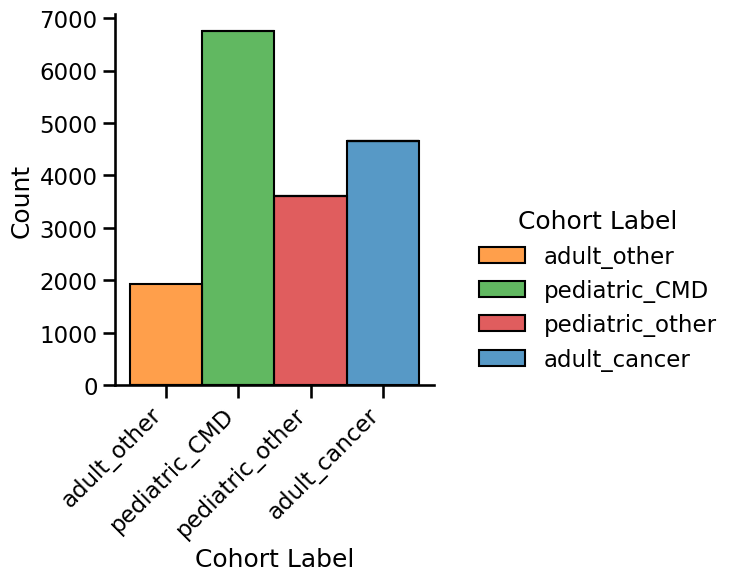

In [ ]:
g = sns.displot(data=pretrain_metadata[~pretrain_metadata['Cohort Label'].isna()],x='Cohort Label',hue='Cohort Label',multiple='stack',stat='count',palette=cohort_label_color_map)
g.set_xticklabels(rotation=45,ha='right')

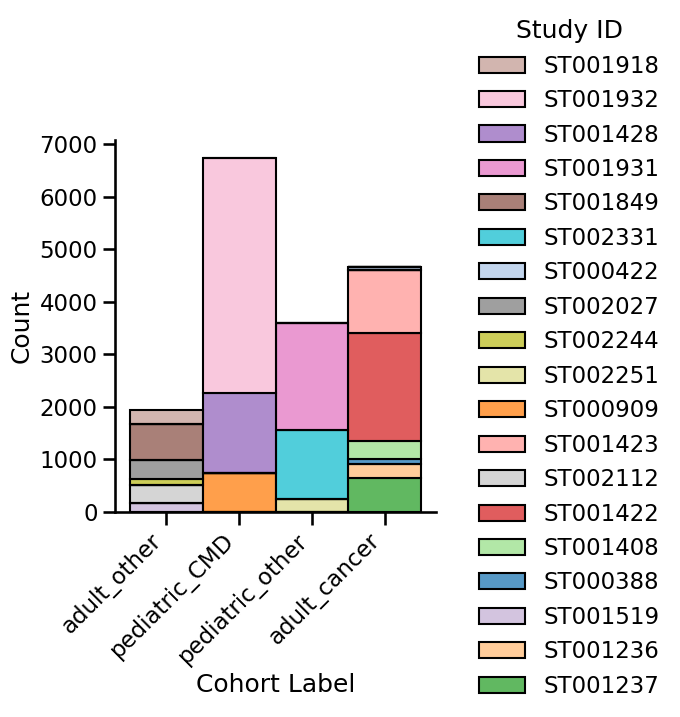

In [ ]:
g = sns.displot(data=pretrain_metadata[~pretrain_metadata['Cohort Label'].isna()],x='Cohort Label',hue='Study ID',multiple='stack',stat='count',palette=study_id_color_map)
g.set_xticklabels(rotation=45,ha='right')

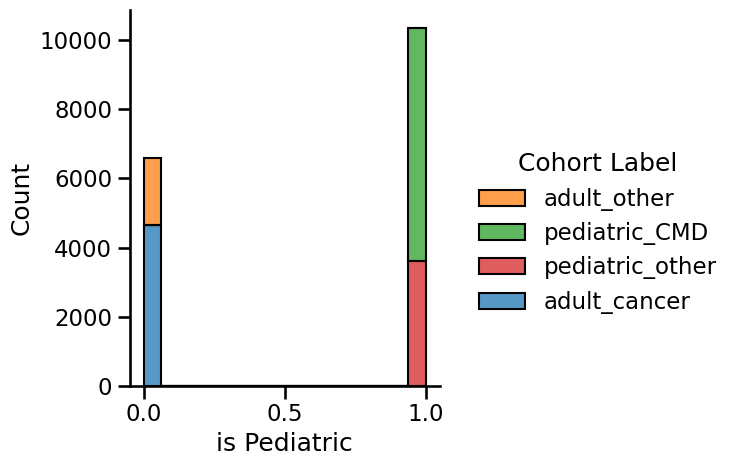

In [ ]:
g = sns.displot(data=pretrain_metadata[~pretrain_metadata['is Pediatric'].isna()],x='is Pediatric',hue='Cohort Label',multiple='stack',stat='count',palette=cohort_label_color_map)

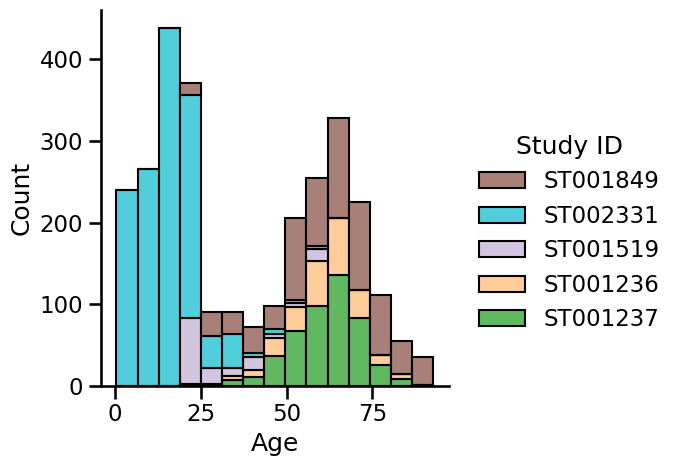

In [ ]:
sns.set_context('talk')

g = sns.displot(data=pretrain_metadata[~pretrain_metadata['Age'].isna()],x='Age',hue='Study ID',multiple='stack',stat='count',palette=study_id_color_map)

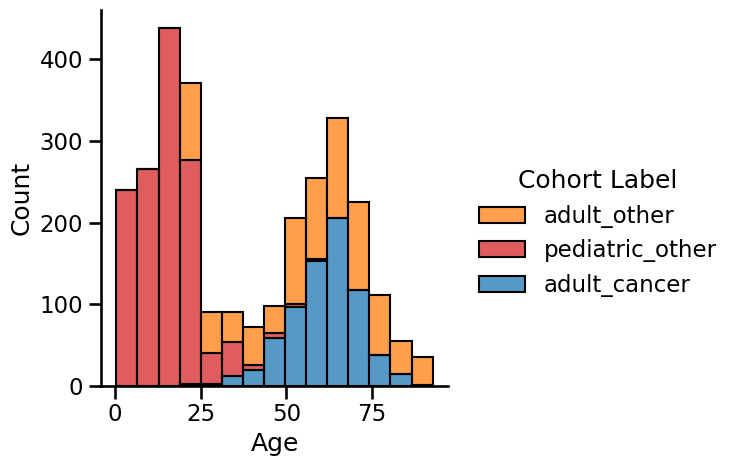

In [ ]:
g = sns.displot(data=pretrain_metadata[~pretrain_metadata['Age'].isna()],x='Age',hue='Cohort Label',multiple='stack',stat='count',palette=cohort_label_color_map)

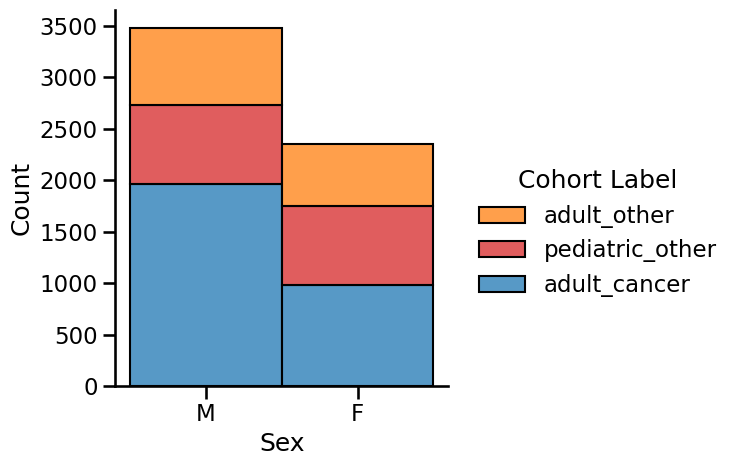

In [ ]:
g = sns.displot(data=pretrain_metadata[~pretrain_metadata['Sex'].isna()],x='Sex',hue='Cohort Label',multiple='stack',stat='count',palette=cohort_label_color_map)

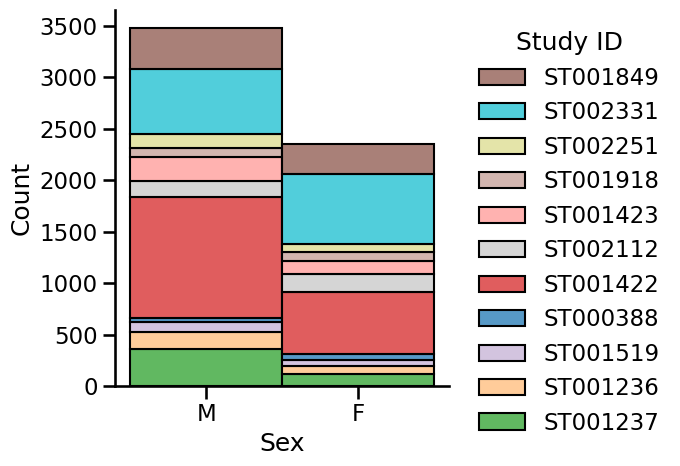

In [ ]:
sns.set_context('talk')
# g = sns.displot(data=pretrain_metadata,x='Sex',hue='Study ID',multiple='stack',stat='count',palette=color_map)
g = sns.displot(data=pretrain_metadata[~pretrain_metadata['Sex'].isna()],x='Sex',hue='Study ID',multiple='stack',stat='count',palette=color_map)


In [ ]:
dir(g.legend)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alignment',
 '_alpha',
 '_animated',
 '_auto_legend_data',
 '_axes',
 '_bbox_to_anchor',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_custom_handler_map',
 '_default_handler_map',
 '_different_canvas',
 '_draggable',
 '_find_best_position',
 '_findoffset',
 '_fontsize',
 '_fully_clipped_to_axes',
 '_get_anchored_bbox',
 '_get_loc',
 '_gid',
 '_in_layout',
 '_init_legend_box',
 '_internal_update',
 '_label',
 '_legend_box',
 '_legend_handle_box',
 '_legend_title_box',
 '_loc',
 '_loc_real',
 '_loc_used_default',
 '_mode',
 '_mouseover',
 '_ncol

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


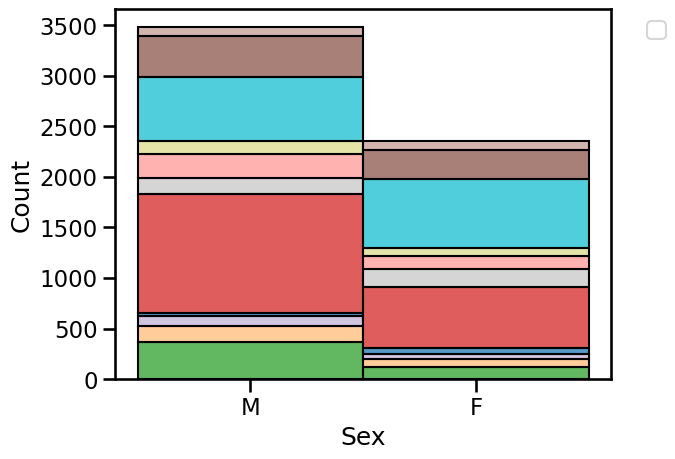

In [ ]:
sns.set_context('talk')
g = sns.histplot(data=pretrain_metadata,x='Sex',hue='Study ID',multiple='stack',stat='count',palette=color_map)
# place the legend outside the plot

# g.legend(loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2)

# # Get the legend
# legend = g.legend_

# # # Place the legend outside the plot
# legend.set_ncols(4)
# legend.set_bbox_to_anchor((1.05, 1))
# legend._loc = 2 

# Get the current handles and labels
# h,l = g.axes[0].get_legend_handles_labels()
# g.axes[0].legend_.remove()
# g.fig.legend(h,l, ncol=2) 
# handles, labels = g.get_legend_handles_labels()

# Place the legend outside the plot with 2 columns
# g.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1), ncol=2)

In [ ]:
dir(legend)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alignment',
 '_alpha',
 '_animated',
 '_auto_legend_data',
 '_axes',
 '_bbox_to_anchor',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_custom_handler_map',
 '_default_handler_map',
 '_different_canvas',
 '_draggable',
 '_find_best_position',
 '_findoffset',
 '_fontsize',
 '_fully_clipped_to_axes',
 '_get_anchored_bbox',
 '_get_loc',
 '_gid',
 '_in_layout',
 '_init_legend_box',
 '_internal_update',
 '_label',
 '_legend_box',
 '_legend_handle_box',
 '_legend_title_box',
 '_loc',
 '_loc_real',
 '_loc_used_default',
 '_mode',
 '_mouseover',
 '_ncol

In [ ]:
handles, labels = g.get_legend_handles_labels()

In [ ]:
labels

[]

<Axes: ylabel='Sex'>

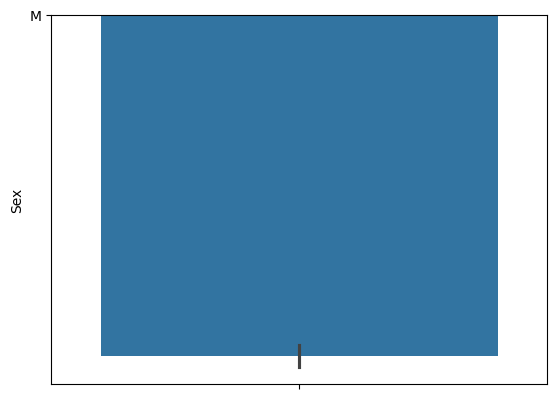

In [ ]:
sns.barplot(y='Sex',data=pretrain_metadata)

In [ ]:
data_file = '/Users/jonaheaton/Desktop/Multi-Obj-Apr08-AE.csv'

In [ ]:
df = pd.read_csv(data_file, header=0, index_col=0)

(array([  8.,  12., 266.,  32.,  62.,  25.,   9.,   7.,   7.,   5.,   4.,
          0.,   2.,   1.,   5.,   3.,   9.,   6.,  22.,  45.]),
 array([-0.77852323, -0.74472212, -0.710921  , -0.67711989, -0.64331877,
        -0.60951765, -0.57571654, -0.54191542, -0.5081143 , -0.47431319,
        -0.44051207, -0.40671096, -0.37290984, -0.33910872, -0.30530761,
        -0.27150649, -0.23770538, -0.20390426, -0.17010314, -0.13630203,
        -0.10250091]),
 <BarContainer object of 20 artists>)

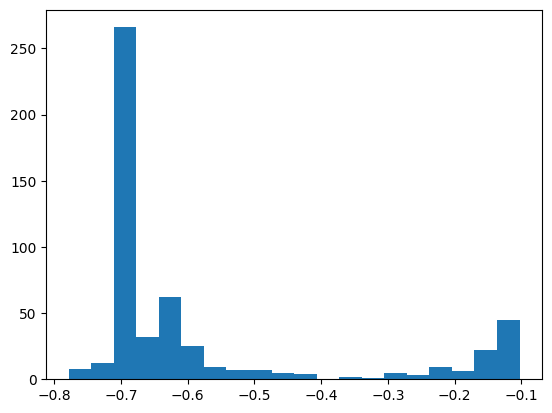

In [ ]:
vals = df['Objective 0']
# log histogram
plt.hist(np.log(vals), bins=20)